<a href="https://colab.research.google.com/github/michaeljonathann/ASX-Stock-Price-Predict-LSTM/blob/main/ASX_Stock_Price_Predict_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import Library & Load Data**

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [ ]:
import yfinance as yf

stock = yf.Ticker('ASX')

# Mengambil data historis saham
start_date = '2010-09-01'
end_date = '2020-08-31'
df = stock.history(start=start_date, end=end_date, interval='1d')

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-09-01 00:00:00-04:00,2.055303,2.153760,2.055303,2.153760,994000,0.0,0.0
2010-09-02 00:00:00-04:00,2.172220,2.202988,2.159913,2.196835,344800,0.0,0.0
2010-09-03 00:00:00-04:00,2.239911,2.282986,2.233757,2.258371,804300,0.0,0.0
2010-09-07 00:00:00-04:00,2.239910,2.239910,2.202989,2.202989,342300,0.0,0.0
2010-09-08 00:00:00-04:00,2.221450,2.239911,2.215296,2.227603,300100,0.0,0.0


#**Preprocessing Data**

In [ ]:
# Preprocessing data
df = df.drop(['Dividends', 'Stock Splits'], axis=1)  # drop the date column
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

In [ ]:
# Membagi data menjadi train dan test set
train_size = int(len(scaled_data) * 0.7)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

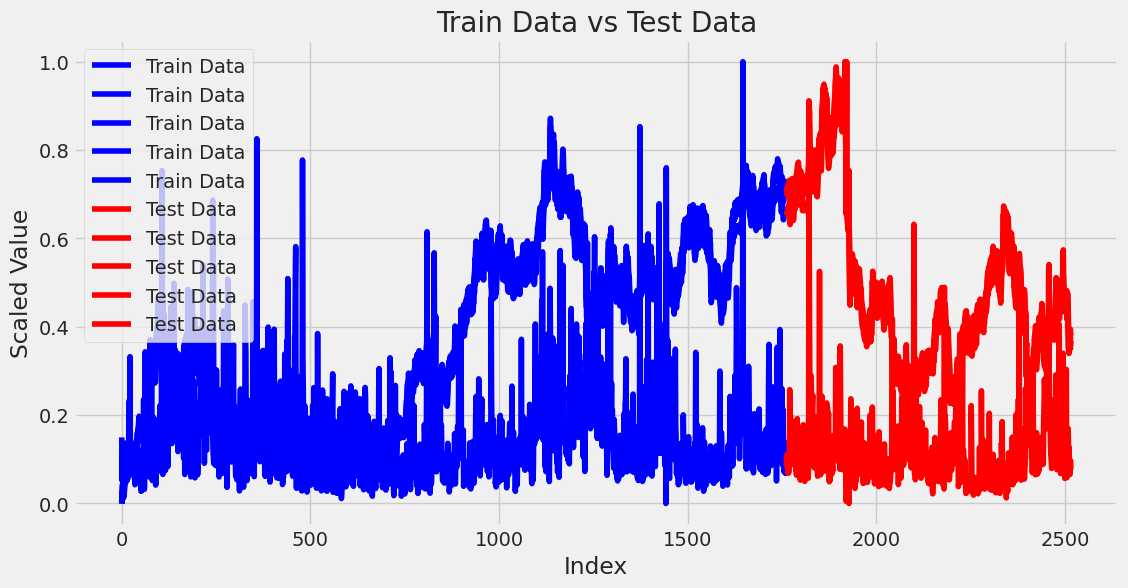

In [ ]:
# Menyiapkan array indeks untuk sumbu x
train_index = range(len(train_data))
test_index = range(len(train_data), len(train_data) + len(test_data))

# Membuat plot perbandingan train_data dan test_data
plt.figure(figsize=(12, 6))
plt.plot(train_index, train_data, label='Train Data', color='blue')
plt.plot(test_index, test_data, label='Test Data', color='red')
plt.xlabel('Index')
plt.ylabel('Scaled Value')
plt.title('Train Data vs Test Data')
plt.legend(loc='upper left')
plt.show()

#**Pembentukan Model & Pelatihan Model LSTM**

In [ ]:
# Membuat dataset untuk input model
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0]
        X.append(a)
        Y.append(data[i+time_step, 0])
    return np.array(X), np.array(Y)

time_step = 20
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [ ]:
# Reshaping data agar sesuai dengan input layer LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Membuat model LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.1))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(50))
model.add(Dropout(0.1))
model.add(Dense(1))

In [ ]:
# Compile dan fit model
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=150, batch_size=64)

Epoch 1/150
28/28 [==============================] - 8s 42ms/step - loss: 0.0287
Epoch 2/150
28/28 [==============================] - 1s 43ms/step - loss: 0.0041
Epoch 3/150
28/28 [==============================] - 1s 42ms/step - loss: 0.0029
Epoch 4/150
28/28 [==============================] - 1s 43ms/step - loss: 0.0027
Epoch 5/150
28/28 [==============================] - 1s 42ms/step - loss: 0.0027
Epoch 6/150
28/28 [==============================] - 1s 42ms/step - loss: 0.0026
Epoch 7/150
28/28 [==============================] - 1s 42ms/step - loss: 0.0024
Epoch 8/150
28/28 [==============================] - 1s 52ms/step - loss: 0.0024
Epoch 9/150
28/28 [==============================] - 2s 72ms/step - loss: 0.0023
Epoch 10/150
28/28 [==============================] - 1s 47ms/step - loss: 0.0023
Epoch 11/150
28/28 [==============================] - 1s 43ms/step - loss: 0.0024
Epoch 12/150
28/28 [==============================] - 1s 44ms/step - loss: 0.0023
Epoch 13/150
28/28 [=====

In [ ]:
# Melakukan prediksi pada data test
Y_pred = model.predict(X_test)

23/23 [==============================] - 1s 10ms/step


#**Evaluasi Model**

In [ ]:
from sklearn.metrics import mean_squared_error

# Menghitung nilai RMSE
mse = mean_squared_error(Y_test, Y_pred, squared=False)
print('MSE:', mse)

MSE: 0.024519706340683803


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Menghitung nilai MAPE
mape = mean_absolute_percentage_error(Y_test, Y_pred)
print('MAPE:', mape)

MAPE: 0.03672557558324581


In [ ]:
from sklearn.metrics import mean_absolute_error

# Menghitung nilai MAE
mae = mean_absolute_error(Y_test, Y_pred)
print('MAE:', mae)

MAE: 0.01621108183293304


In [ ]:
from sklearn.metrics import r2_score

# Menghitung nilai R2 score
r2score = r2_score(Y_test, Y_pred)
print('R2 Score:', r2score)

R2 Score: 0.9829992346842231


#**Visualisasi Prediksi**

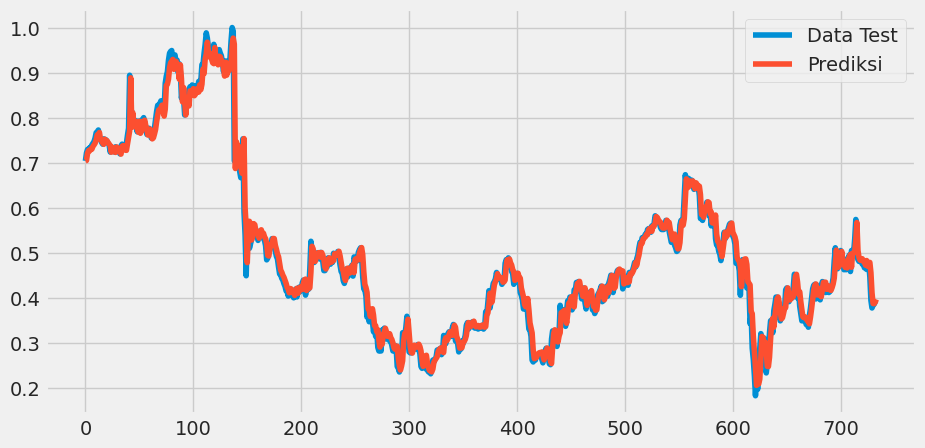

In [ ]:
# Membuat plot hasil prediksi dan data test
plt.figure(figsize=(10, 5))
plt.plot(Y_test.flatten(), label='Data Test')
plt.plot(Y_pred.flatten(), label='Prediksi')
plt.legend()
plt.show()